<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/EDA_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E12 - Insurance Premium Prediction Dataset**

## Problem Statement

The goal of this dataset is to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. Insurance companies often rely on data-driven approaches to estimate premiums, taking into account factors such as age, income, health status, and claim history. This synthetic dataset simulates real-world scenarios to help practitioners practice feature engineering, data cleaning, and model training.

## Dataset Overview

This dataset contains 2Lk+ and 20 features with a mix of categorical, numerical, and text data. It includes missing values, incorrect data types, and skewed distributions to mimic the complexities faced in real-world datasets. The target variable for prediction is the "Premium Amount".

### Features

1. Age: Age of the insured individual (Numerical)
2. Gender: Gender of the insured individual (Categorical: Male, Female)
3. Annual Income: Annual income of the insured individual (Numerical, skewed)
4. Marital Status: Marital status of the insured individual (Categorical: Single, Married, Divorced)
5. Number of Dependents: Number of dependents (Numerical, with missing values)
6. Education Level: Highest education level attained (Categorical: High School, Bachelor's, Master's, PhD)
7. Occupation: Occupation of the insured individual (Categorical: Employed, Self-Employed, Unemployed)
8. Health Score: A score representing the health status (Numerical, skewed)
9. Location: Type of location (Categorical: Urban, Suburban, Rural)
10. Policy Type: Type of insurance policy (Categorical: Basic, Comprehensive, Premium)
11. Previous Claims: Number of previous claims made (Numerical, with outliers)
12. Vehicle Age: Age of the vehicle insured (Numerical)
13. Credit Score: Credit score of the insured individual (Numerical, with missing values)
14. Insurance Duration: Duration of the insurance policy (Numerical, in years)
15. Premium Amount: Target variable representing the insurance premium amount (Numerical, skewed)
16. Policy Start Date: Start date of the insurance policy (Text, improperly formatted)
17. Customer Feedback: Short feedback comments from customers (Text)
18. Smoking Status: Smoking status of the insured individual (Categorical: Yes, No)
19. Exercise Frequency: Frequency of exercise (Categorical: Daily, Weekly, Monthly, Rarely)
20. Property Type: Type of property owned (Categorical: House, Apartment, Condo)

# Data Characteristics

- Missing Values: Certain features contain missing values to simulate real-world data collection issues.
- Incorrect Data Types: Some fields are intentionally set to incorrect data types to practice data cleaning.
- Skewed Distributions: Numerical features like **Annual Income** and **Premium Amount** have skewed distributions, which can be addressed through transformations.

In [1]:
%%capture
!pip install -qq pytorch_tabnet
!pip install optuna
!pip install catboost
!pip install optuna-integration-pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor

!pip install category-encoders
!pip install optuna-integration

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!pip install skops

from pytorch_tabnet.tab_model import TabNetRegressor

In [2]:
# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
# Set Style
sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5});
sns.despine(left=True, bottom=True, top=False, right=False);
mpl.rcParams['figure.dpi'] = 120;
mpl.rc('axes', labelsize=12);
plt.rc('xtick',labelsize=10);
plt.rc('ytick',labelsize=10);

mpl.rcParams['axes.spines.top'] = False;
mpl.rcParams['axes.spines.right'] = False;
mpl.rcParams['axes.spines.left'] = True;

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

# tool for Excel:
from openpyxl import load_workbook, Workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import Border, Side, PatternFill, Font, GradientFill, Alignment
from openpyxl.worksheet.cell_range import CellRange

from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
import skops.io as sio
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             root_mean_squared_log_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)
# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              StackingClassifier,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
from openpyxl import load_workbook

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-2-c163ae404945>:112: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


<Figure size 640x480 with 0 Axes>

In [3]:
sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

<Figure size 960x660 with 0 Axes>

In [4]:
from tqdm import tqdm
from itertools import product

import numpy as np
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import GroupKFold
from sklearn.impute import SimpleImputer
import torch

import warnings
warnings.filterwarnings("ignore")

# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:100%; font-family:Arial, sans-serif; background-color:#A8DADC; color:#1D3557; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.2);">
    <h3>Loading and Preprocessing Data for Compatibility</h3>
</div>


In [80]:
df_train = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/train_no_nan.csv')

df_test = pd.read_csv('/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/test_no_nan.csv')

df_test_orig = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/test.csv',
     index_col='id',
     parse_dates=['Policy Start Date'],
)

df_train_orig = pd.read_csv(
    '/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/train.csv',
     index_col='id',
     parse_dates=['Policy Start Date'],
)

df_subm = pd.read_csv(
    "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/sample_submission.csv",
     index_col='id',
)

# df_orig = pd.read_csv(
#     "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E12/Insurance Premium Prediction Dataset.csv",
#      parse_dates=['Policy Start Date'],
#     #     index_col='id',
# )

In [81]:
# # Convert `Policy Start Date` column to datetime64 format
# df_orig['Policy Start Date'] = pd.to_datetime(df_orig['Policy Start Date'])

# # Calculate the difference in days between today and the `Policy Start Date` column
# today = pd.to_datetime('today')
# difference_in_days = today - df_orig['Policy Start Date']

# # Divide the difference in days by 365 to get the difference in years
# difference_in_years = difference_in_days / pd.Timedelta(days=365)

# # Convert the `Policy Start Date` column to the number of years since the policy start date
# df_orig['Policy Start Date'] = difference_in_years

In [82]:
df_train["Start_Year"] = df_train_orig["Policy Start Date"].dt.year
df_train["Start_Month"] = df_train_orig["Policy Start Date"].dt.month
df_train["Start_Day"] = df_train_orig["Policy Start Date"].dt.weekday

df_test["Start_Year"] = df_test_orig["Policy Start Date"].dt.year.values
df_test["Start_Month"] = df_test_orig["Policy Start Date"].dt.month.values
df_test["Start_Day"] = df_test_orig["Policy Start Date"].dt.weekday.values

In [83]:
# df_orig.dropna(axis=0,how="any").shape
df_train_orig.head()
#df_test["Policy Start Date"].dt.year

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [84]:
df_train.shape, df_test.shape, df_subm.shape #, df_orig.shape, df_orig.shape

((1200000, 23), (800000, 23), (800000, 1))

In [85]:
print("Pytorch Version: {}".format(torch.__version__))
print("SKLearn Version: {}".format(sklearn.__version__))

Pytorch Version: 2.5.1+cu121
SKLearn Version: 1.5.2


In [86]:
100*df_train.isnull().sum()/df_train.shape[0]

,0
Age,0.0
Gender,0.0
Annual Income,0.0
Marital Status,0.0
Number of Dependents,0.0
Education Level,0.0
Occupation,0.0
Health Score,0.0
Location,0.0
Policy Type,0.0


In [87]:
100*df_test.isnull().sum()/df_test.shape[0]

,0
Age,0.0
Gender,0.0
Annual Income,0.0
Marital Status,0.0
Number of Dependents,0.0
Education Level,0.0
Occupation,0.0
Health Score,0.0
Location,0.0
Policy Type,0.0


In [88]:
df_train.head(3)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1200000 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1200000 non-null  float64
 4   Number of Dependents  1200000 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            1200000 non-null  float64
 7   Health Score          1200000 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1200000 non-null  float64
 12  Credit Score          1200000 non-null  float64
 13  Insurance Duration    1200000 non-null  float64
 14  Policy Start Date     1200000 non-

In [89]:
df_train.nunique()

,0
Age,47
Gender,2
Annual Income,91633
Marital Status,3
Number of Dependents,5
Education Level,4
Occupation,3
Health Score,532670
Location,3
Policy Type,3


In [90]:
categorical_cols = ["Gender","Marital Status","Number of Dependents","Education Level","Occupation","Location","Policy Type","Previous Claims","Insurance Duration","Customer Feedback","Smoking Status","Exercise Frequency","Property Type",
                    "Start_Year","Start_Month","Start_Day"]
numerical_cols = ["Age","Annual Income","Health Score","Vehicle Age","Credit Score","Policy Start Date"]

target = ['Premium Amount']

len(categorical_cols+numerical_cols+target),len(df_train.columns)

(23, 23)

## 1.0 Time Features:

Here the following features are reviewed:

* "Start_Year"
* "Start_Month"
* "Start_Day"
* "Policy Start Date"

In [91]:
# ts_monthly = df_train.groupby(["Start_Year"], as_index=False)["Premium Amount"].agg(["mean","std","skew","median","min","max","count"])
# ts_monthly_test = df_test.groupby(["Start_Year"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])

# fig, axs = plt.subplots(1,2,figsize=(10, 4))
# ts_monthly["mean"].plot(color="#0485d1", ax=axs[0])
# ts_monthly["std"].plot(color="#c875c4", ax=axs[0])
# ts_monthly["median"].plot(color="#fd411e", ax=axs[0])
# ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])

In [92]:
# ts_monthly = df_train.groupby(["Start_Month"], as_index=False)["Premium Amount"].agg(["mean","std","skew","median","min","max","count"])
# ts_monthly_test = df_test.groupby(["Start_Month"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])

# fig, axs = plt.subplots(1,2,figsize=(10, 4))
# ts_monthly["mean"].plot(color="#0485d1", ax=axs[0])

# ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])

<Axes: xlabel='Start_Year,Start_Month'>

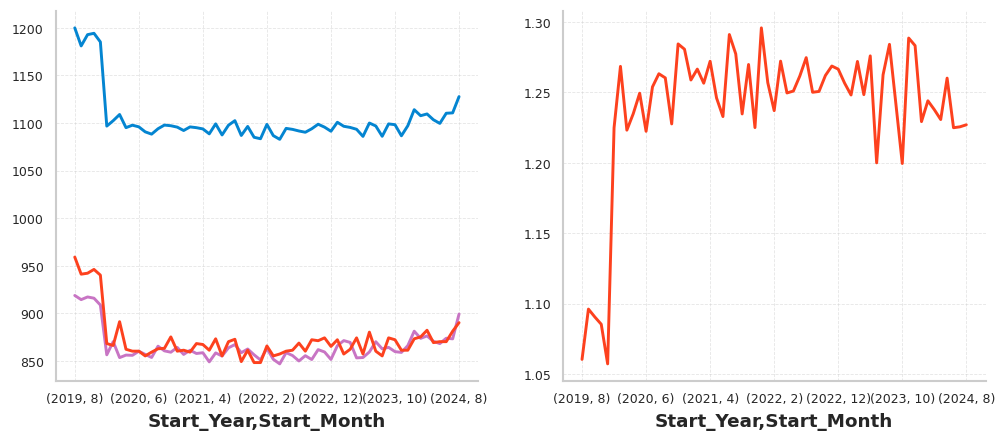

In [93]:
ts_monthly = df_train.groupby(["Start_Year","Start_Month"])["Premium Amount"].agg(["mean","std","skew","median","min","max","count"])
ts_monthly_test = df_test.groupby(["Start_Year","Start_Month"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])

fig, axs = plt.subplots(1,2,figsize=(10, 4))
ts_monthly["mean"].plot(color="#0485d1", ax=axs[0])
ts_monthly["std"].plot(color="#c875c4", ax=axs[0])
ts_monthly["median"].plot(color="#fd411e", ax=axs[0])
ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])

<Axes: >

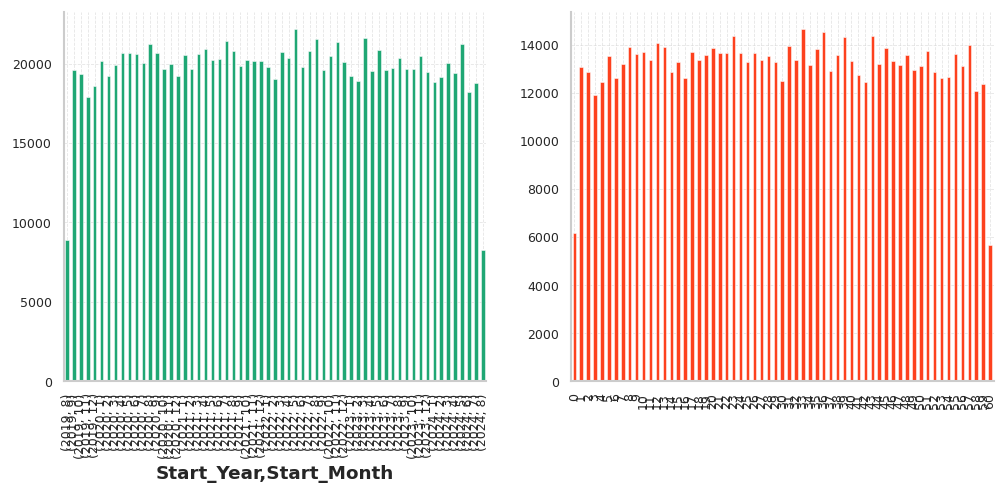

In [94]:
fig, axs = plt.subplots(1,2,figsize=(10, 4))
ts_monthly["count"].plot(kind="bar",color="#1fa774", ax=axs[0])
ts_monthly_test["count"].plot(kind="bar",color="#fd411e", ax=axs[1])

<Axes: >

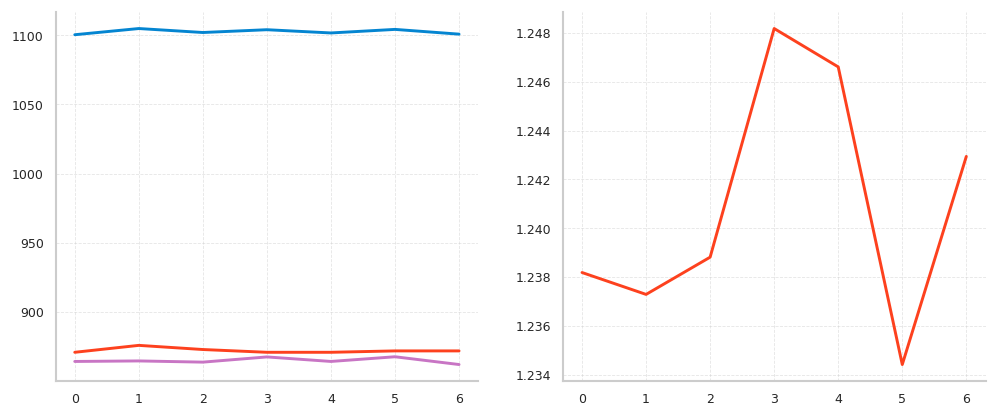

In [95]:
ts_day = df_train.groupby(["Start_Day"], as_index=False)["Premium Amount"].agg(["mean","std","skew","median","min","max","count"])
ts_day_test = df_test.groupby(["Start_Day"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])

fig, axs = plt.subplots(1,2,figsize=(10, 4))
ts_day["mean"].plot(color="#0485d1", ax=axs[0])
ts_day["std"].plot(color="#c875c4", ax=axs[0])
ts_day["median"].plot(color="#fd411e", ax=axs[0])
ts_day["skew"].plot(color="#fd411e", ax=axs[1])

<Axes: >

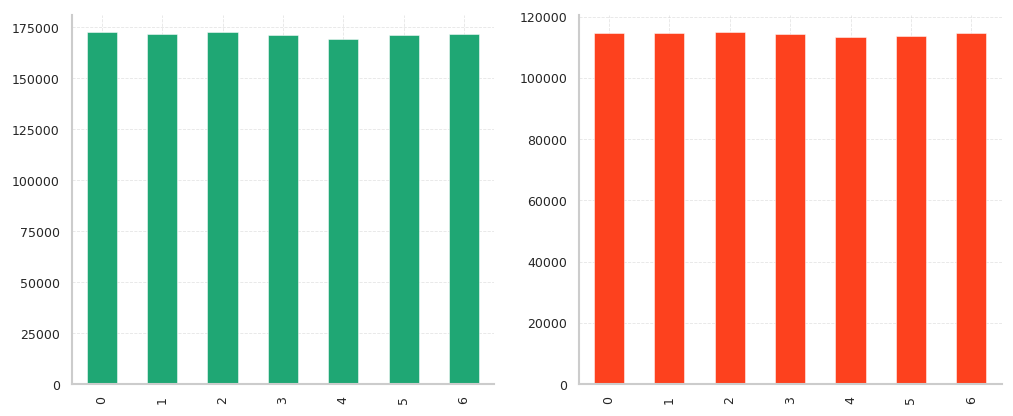

In [96]:
fig, axs = plt.subplots(1,2,figsize=(10, 4))
ts_day["count"].plot(kind="bar",color="#1fa774", ax=axs[0])
ts_day_test["count"].plot(kind="bar",color="#fd411e", ax=axs[1])

In [97]:
ts_monthly_test

,Start_Year,Start_Month,mean,std,skew,min,max,count
0,2019,8,25.438731,12.155909,0.260795,2.535950,53.929114,6180
1,2019,9,25.853526,11.850113,0.242168,2.352529,55.858405,13064
2,2019,10,25.811580,12.014133,0.228149,2.153887,55.391965,12886
3,2019,11,25.787736,12.020915,0.259106,2.095544,55.482646,11906
4,2019,12,25.606343,12.040425,0.275727,2.036747,55.095971,12449
...,...,...,...,...,...,...,...,...
56,2024,4,25.480444,11.776720,0.307920,2.121629,56.302032,13131
57,2024,5,25.612147,11.715918,0.273514,2.137847,57.386945,14007
58,2024,6,25.606927,11.900429,0.272831,2.625528,57.527415,12077
59,2024,7,25.591766,11.875766,0.282534,2.166346,55.512656,12355


In [98]:
df_train = pd.merge(df_train, ts_monthly["mean"], on=["Start_Year","Start_Month"], how='outer')
df_test = pd.merge(df_test, ts_monthly["mean"], on=["Start_Year","Start_Month"], how='outer')

In [100]:
df_train.rename(columns={'mean': 'Premium_time_Mean'}, inplace=True)
df_test.rename(columns={'mean': 'Premium_time_Mean'}, inplace=True)

In [110]:
ts_monthly = df_train.groupby(["Start_Year","Start_Month","Policy Type"], as_index=False)[["Premium Amount"]].agg(["mean"])
ts_monthly_test = df_test.groupby(["Start_Year","Start_Month"], as_index=False)["Health Score"].agg(["mean","std","skew","min","max","count"])
# fig, axs = plt.subplots(1,2,figsize=(10, 4))
# ts_monthly[("Premium Amount","mean")].plot(ax=axs[0])
# ts_monthly[("Credit Score","mean")].plot(ax=axs[1])
# ts_monthly["std"].plot(color="#c875c4", ax=axs[0])
# ts_monthly["median"].plot(color="#fd411e", ax=axs[0])
# ts_monthly["skew"].plot(color="#fd411e", ax=axs[1])

<Axes: >

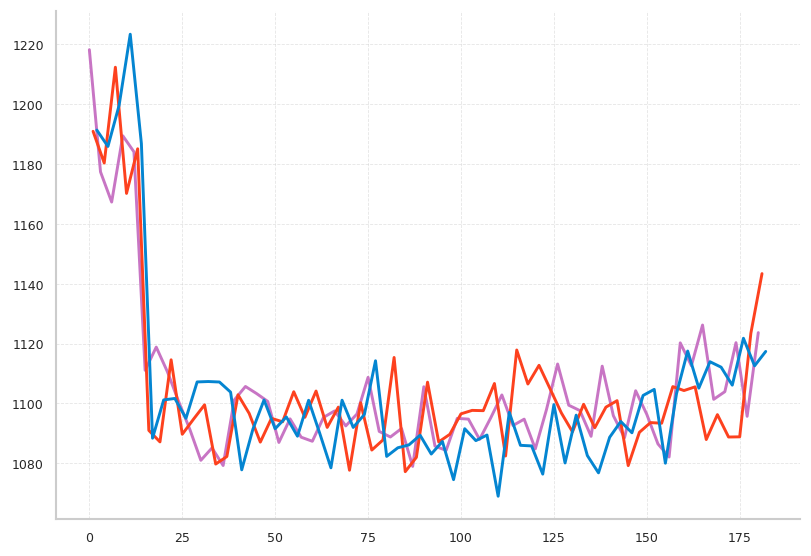

In [121]:
ts_monthly[ts_monthly["Policy Type"]=="Basic"][("Premium Amount","mean")].plot(color="#c875c4")
ts_monthly[ts_monthly["Policy Type"]=="Comprehensive"][("Premium Amount","mean")].plot(color="#fd411e")
ts_monthly[ts_monthly["Policy Type"]=="Premium"][("Premium Amount","mean")].plot(color="#0485d1")

In [119]:
ts_monthly

,Start_Year,Start_Month,Policy Type,Premium Amount
,,,,mean
0,2019,8,Basic,1218.150560
1,2019,8,Comprehensive,1190.893467
2,2019,8,Premium,1191.311179
3,2019,9,Basic,1177.339793
4,2019,9,Comprehensive,1180.293005
...,...,...,...,...
178,2024,7,Comprehensive,1123.442769
179,2024,7,Premium,1112.563656
180,2024,8,Basic,1123.658636
